# **MarketMetrics – Analyzing Grocery & FMCG Pricing Trends**

In [2]:
# We are importing the pandas library for data manipulation and analysis.Here We are Reading the BigBasket dataset CSV file and Displaying the first five rows to understand the structure and contents.
import pandas as pd
df = pd.read_csv("bigbasket.csv")
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


# Data Cleaning

In [3]:
# It Show all column names 
df.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [4]:
# Here We are Removeing ₹ symbol
df['sale_price'] = df['sale_price'].replace('₹', '', regex=True)

In [5]:
df['sale_price'] = df['sale_price'].replace(',', '', regex=True)

In [6]:
# Converting into Float
df['sale_price'] = pd.to_numeric(df['sale_price'], errors='coerce')

In [7]:
# Now lets Handle Null Values 
# By using this command we are checking for missing values
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [8]:
df = df.dropna(subset=['product'])

In [9]:
df.loc[:, 'rating'] = df['rating'].fillna(0)

In [10]:
df.loc[:, 'brand'] = df['brand'].fillna('No Brand')

In [11]:
df.loc[:, 'description'] = df['description'].fillna('')

In [12]:
df.isnull().sum()
# Here We can see that We handled all the missing values filled with replacing values.

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [13]:
# Droping duplicates
df = df.drop_duplicates()

In [14]:
# Now lets Check Data Summary by using these commands
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 27554 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27554 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27554 non-null  object 
 3   sub_category  27554 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27554 non-null  float64
 6   market_price  27554 non-null  float64
 7   type          27554 non-null  object 
 8   rating        27554 non-null  float64
 9   description   27554 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.3+ MB


,index,sale_price,market_price,rating
count,27554.000000,27554.000000,27554.000000,27554.000000
mean,13777.978733,322.519254,382.061820,2.708884
std,7954.731236,486.271379,581.740644,1.928600
min,1.000000,2.450000,3.000000,0.000000
25%,6889.250000,95.000000,100.000000,0.000000
50%,13777.500000,190.000000,220.000000,3.800000
75%,20666.750000,359.000000,425.000000,4.200000
max,27555.000000,12500.000000,12500.000000,5.000000


# EDA & Visualization

In [15]:
# importing matplotlib and Seaborn library for visualization
import matplotlib.pyplot as plt
import seaborn as sns


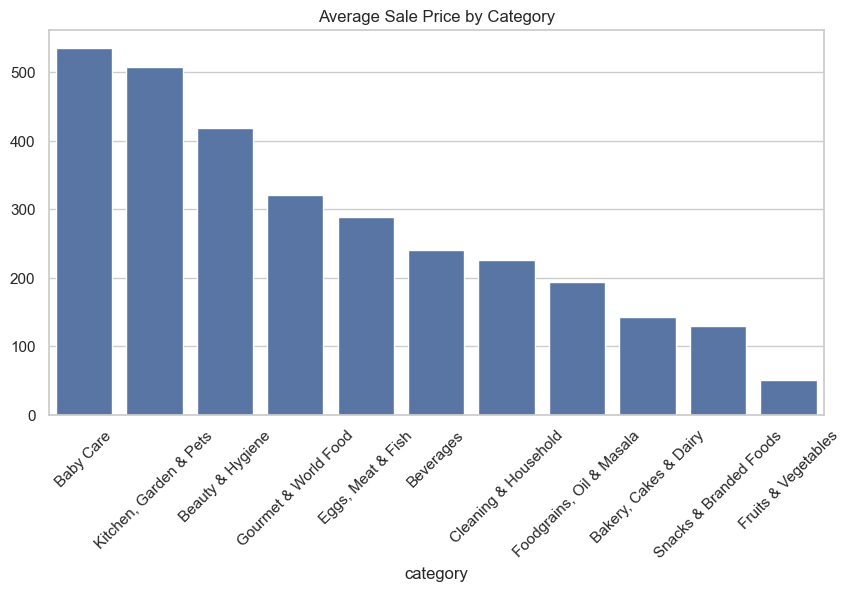

In [16]:
#1 Grouped Bar Chart – Average Sale Price by Category
sns.set(style="whitegrid")
avgprice_cat = df.groupby('category')['sale_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avgprice_cat.index, y=avgprice_cat.values)
plt.xticks(rotation=45)
plt.title("Average Sale Price by Category")
plt.show()


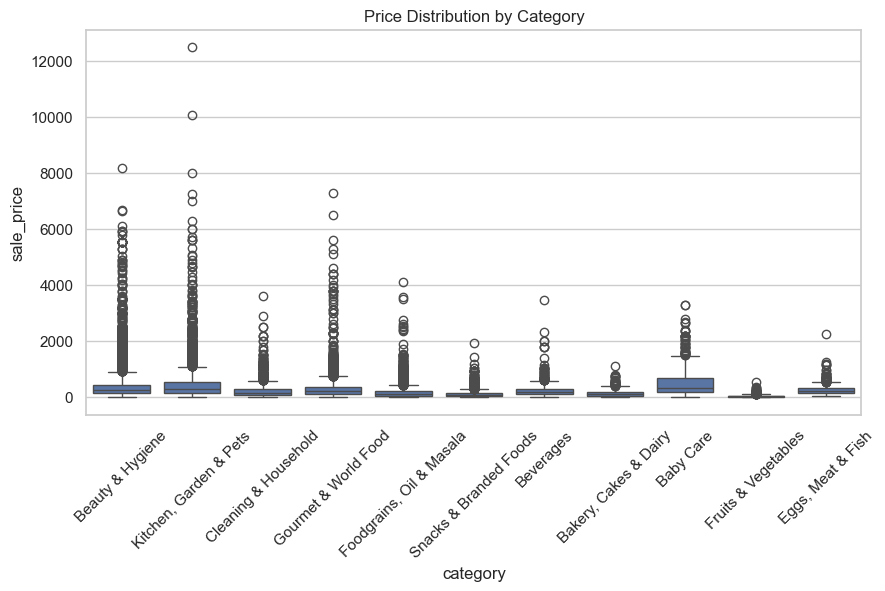

In [17]:
#2 Box Plot – Price Distribution per Category
plt.figure(figsize=(10, 5))
sns.boxplot(x='category', y='sale_price', data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Category")
plt.show()


In [18]:
#3 Branded vs. Unbranded Product Prices
df['is_branded'] = df['brand'].apply(lambda x: 'Unbranded' if str(x).strip().lower() == 'no brand' else 'Branded')

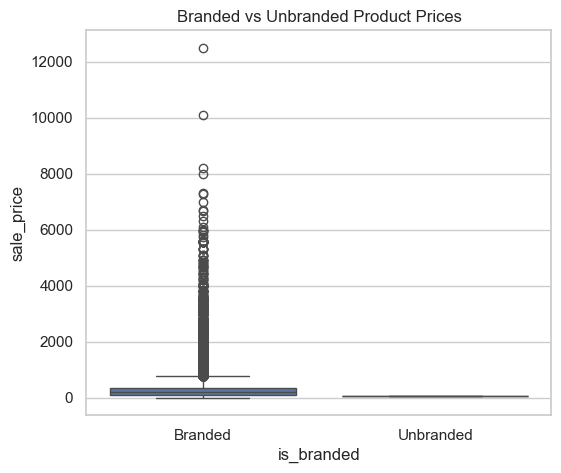

In [19]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='is_branded', y='sale_price', data=df)
plt.title("Branded vs Unbranded Product Prices")
plt.show()

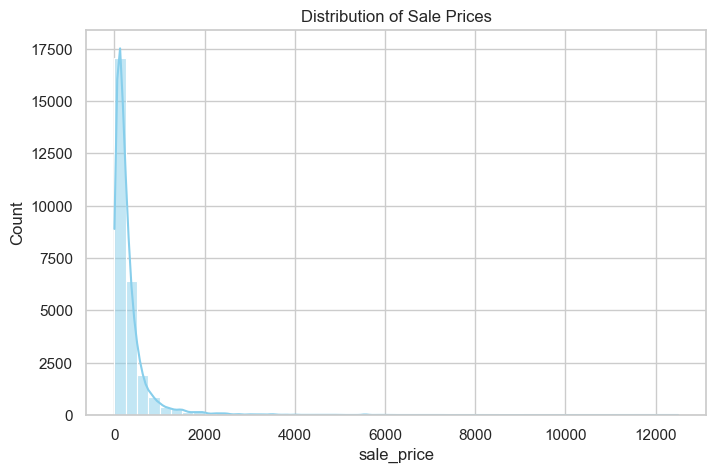

In [20]:
#4 Distribution Plot of Sale Price
plt.figure(figsize=(8, 5))
sns.histplot(df['sale_price'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Sale Prices")
plt.show()


In [21]:
#5 Correlation Heatmap
num_cols = df[['sale_price', 'market_price', 'rating']]
corr = num_cols.corr()

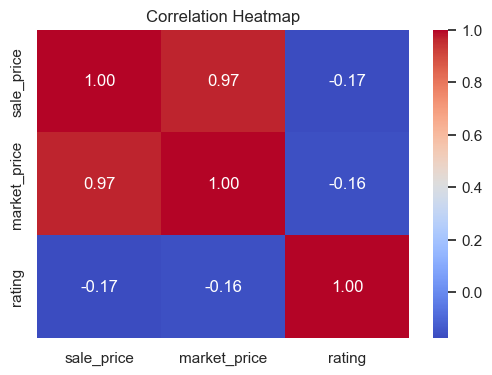

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Statistics Tasks

In [23]:
#1 T-Test: Branded vs. Unbranded Product Prices
from scipy.stats import ttest_ind
brand_prices = df[df['is_branded'] == 'Branded']['sale_price']
unbrand_prices = df[df['is_branded'] == 'Unbranded']['sale_price']

t_stat, p_val = ttest_ind(brand_prices, unbrand_prices, equal_var=False)

print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_val:.4f}")

if p_val < 0.05:
    print("Result: Significant difference between Branded and Unbranded prices.")
else:
    print("Result: No significant difference between Branded and Unbranded prices.")

T-Statistic: nan
P-Value: nan
Result: No significant difference between Branded and Unbranded prices.


C:\Users\Ankit Yadav\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Ankit Yadav\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [24]:
#2 Descriptive Statistics by Category
stats_cat = df.groupby('category')['sale_price'].agg(['mean', 'median', 'std']).round(2)
print(stats_cat)

                            mean  median     std
category                                        
Baby Care                 534.95  319.66  536.03
Bakery, Cakes & Dairy     142.80  109.00  131.12
Beauty & Hygiene          418.68  245.00  590.15
Beverages                 239.80  175.00  257.08
Cleaning & Household      226.17  159.00  251.04
Eggs, Meat & Fish         288.90  230.00  229.28
Foodgrains, Oil & Masala  193.17  100.00  277.55
Fruits & Vegetables        50.89   32.00   54.26
Gourmet & World Food      319.85  239.70  404.91
Kitchen, Garden & Pets    507.52  299.00  716.08
Snacks & Branded Foods    129.59   87.12  142.28


In [25]:
#3  One-Way ANOVA: Do Prices Vary Significantly by Category?
# Here We are checking if average prices across categories are not all equal.
from scipy.stats import f_oneway

groups = [group['sale_price'].values for name, group in df.groupby('category')]
f_stat, p_val = f_oneway(*groups)
print(f"F-Statistic: {f_stat:.3f}")
print(f"P-Value: {p_val:.4f}")

if p_val < 0.05:
    print("Result: Significant difference in prices across categories.")
else:
    print("Result: No significant difference in prices across categories.")

F-Statistic: 215.225
P-Value: 0.0000
Result: Significant difference in prices across categories.


In [27]:
#4 Chi-Square Test
from scipy.stats import chi2_contingency

# Creating contingency Table and then running chi square test.
contingency = pd.crosstab(df['category'], df['is_branded'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")

if p < 0.05:
    print("Category and Brand Status are dependent.")
else:
    print("No similarity between Category and Brand Status.")


Chi-square Statistic: 9.30
P-Value: 0.5038
No similarity between Category and Brand Status.
